# 基于palettable的配色

**囊括了CartoColors、cmocean、Colorbrewer2、Cubehelix、Light & Bartlein、matplotlib、MyCarta、Scientific、Tableau以及The Wes Anderson Palettes blog中的大量经典配色方案https://jiffyclub.github.io/palettable/cartocolors/diverging/：**

- palettable.cartocolors.diverging
- palettable.cartocolors.qualitative
- palettable.cartocolors.sequential
- palettable.cmocean.diverging
- palettable.cmocean.sequential
- palettable.colorbrewer.diverging
- palettable.colorbrewer.qualitative
- palettable.colorbrewer.sequential
- palettable.lightbartlein.diverging
- palettable.lightbartlein.sequential
- palettable.matplotlib
- palettable.mycarta
- palettable.scientific.diverging
- palettable.scientific.sequential
- palettable.tableau
- palettable.wesanderson 

譬如如果我们想要使用palettable.cmocean.sequential中的色彩，其中cmocean表示色彩来源，sequential表示连续型色彩，就可以先在对应的示例网页https://jiffyclub.github.io/palettable/cmocean/sequential/ 下查看所有方案：
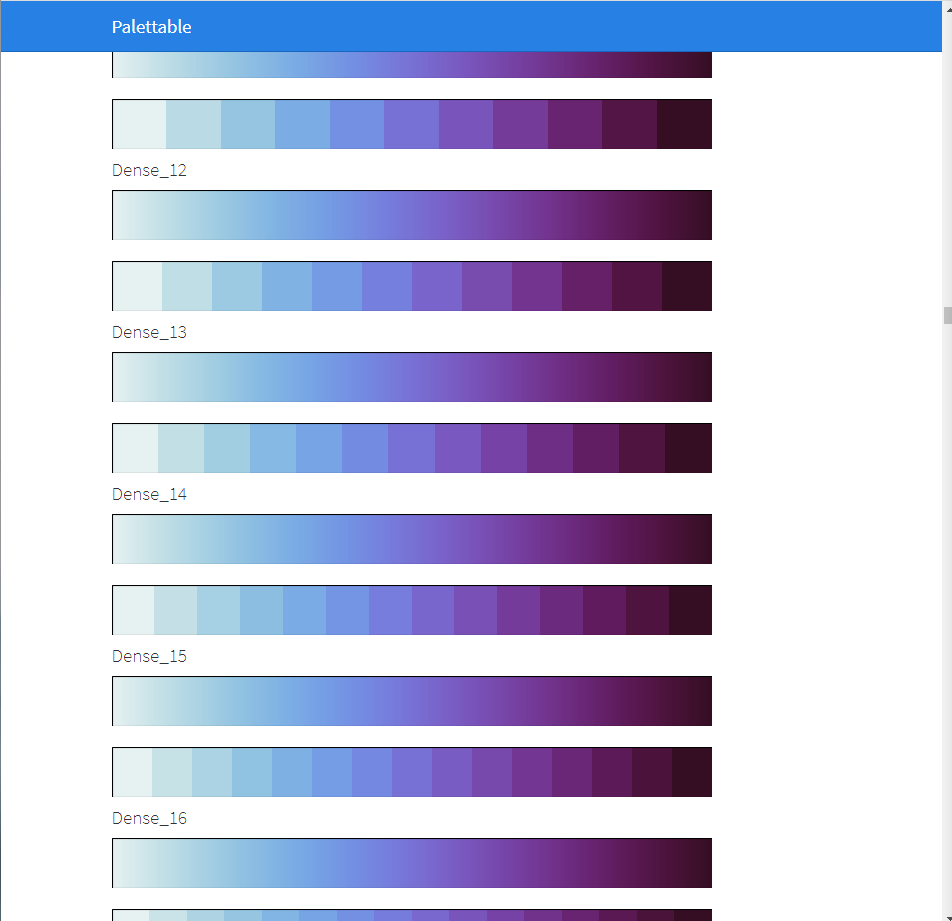

对应离散颜色：
[[230, 241, 241],
 [208, 230, 233],
 [185, 218, 228],
 [165, 207, 226],
 [146, 195, 226],
 [131, 182, 227],
 [120, 168, 228],
 [116, 154, 228],
 [116, 138, 226],
 [118, 121, 218],
 [120, 106, 208],
 [121, 90, 193],
 [120, 76, 177],
 [117, 62, 159],
 [112, 49, 138],
 [106, 38, 117],
 [96, 28, 94],
 [85, 22, 73],
 [70, 18, 52],
 [54, 14, 36]]
离散：


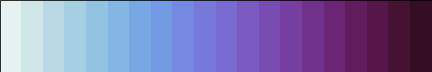

连续:


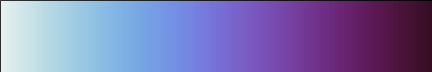

In [5]:
from palettable.cmocean.sequential import Dense_20
from pprint import pprint

print('对应离散颜色：')
pprint(Dense_20.colors)
print('离散：')
Dense_20.show_discrete_image()
print('连续:')
Dense_20.show_continuous_image()

# 使用.mpl_colormap将其转换为matplotlib可接受的cmap数据结构，作为cmap参数值传入绘图部分即可
# 如果想要翻转映射方向，换成Dense_20_r再重复上述操作即可`

# 基于海报选色


## 贾樟柯导演的《一直游到海水变蓝》中文版海报

(-0.5, 599.5, 855.5, -0.5)

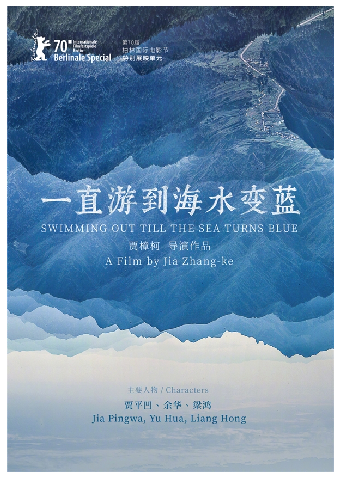

In [6]:
import matplotlib.pyplot as plt

sea_domestic=plt.imread('C:/Users/60448/Desktop/一直游到海水变蓝_中文版.jpg')
fig,ax=plt.subplots(figsize=(6,8.56))   # 根据图片原始分辨率选取合适画幅
ax.imshow(sea_domestic)
ax.axis('off')

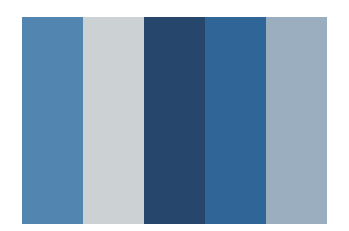

In [8]:
from sklearn.cluster import KMeans
import pandas as pd


# 构建特征
rgb = pd.DataFrame([sea_domestic[x][y] for x in range(sea_domestic.shape[0])
                    for y in range(sea_domestic.shape[1])], columns=['r', 'g', 'b'])

# k-means聚类，n_clusters表示聚类数量
model=KMeans(n_clusters=5,n_jobs=4)
model.fit(rgb)

# 提取聚类簇重心，即需要的主色，添加到绘色版
plt.bar([i for i in range(model.cluster_centers_.__len__())],
        height=[1 for i in range(model.cluster_centers_.__len__())],
        color=[tuple(c) for c in (model.cluster_centers_/255.)],
        width=1)

plt.axis('off')
plt.savefig('sea_domestic',dpi=300)

(-0.5, 639.5, 905.5, -0.5)

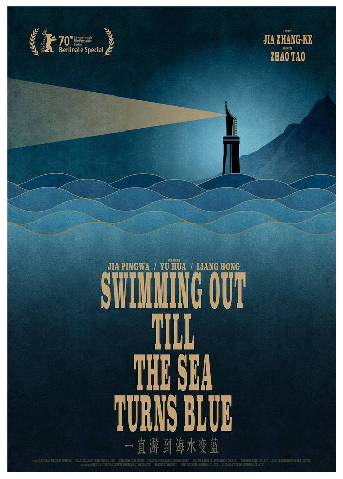

In [10]:
sea_foreign=plt.imread('C:/Users/60448/Desktop/一直游到海水变蓝_海外版.jpg')
fig,ax=plt.subplots(figsize=(6,8.56))
ax.imshow(sea_foreign)
ax.axis('off')

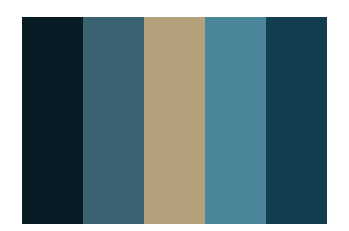

In [11]:
from sklearn.cluster import KMeans
import pandas as pd


# 构建特征
rgb = pd.DataFrame([sea_foreign[x][y] for x in range(sea_foreign.shape[0])
                    for y in range(sea_foreign.shape[1])], columns=['r', 'g', 'b'])

# k-means聚类，n_clusters表示聚类数量
model=KMeans(n_clusters=5,n_jobs=4)
model.fit(rgb)

# 提取聚类簇重心，即需要的主色，添加到绘色版
plt.bar([i for i in range(model.cluster_centers_.__len__())],
        height=[1 for i in range(model.cluster_centers_.__len__())],
        color=[tuple(c) for c in (model.cluster_centers_/255.)],
        width=1)

plt.axis('off')
plt.savefig('sea_foreign',dpi=300)